# Exploratory Data Analysis on Indian Startup Funding

Here I will Analyze the Indian Startup Funding data and visualize to see the funding trend between the years 2015-2020. This dataset was obtained from Kaggle. I will create a intuitive and simple visualizations to observe the startup trends in India.

## Downloading the Dataset

This data set has about 10 columns such as Startup Name, Investors Name, etc. which can be seen in the below cells. It contains investments from 2015-2020.

In [1]:
from urllib.request import urlretrieve

In [2]:
dataset_url = 'https://raw.githubusercontent.com/suhas-005/EDA-Indian-Startup-Funding/main/startup_funding.csv' 

In [3]:
urlretrieve(dataset_url, 'startup_funding.csv')

('startup_funding.csv', <http.client.HTTPMessage at 0x2041de9b100>)

The dataset has been downloaded and extracted.

## Data Preparation and Cleaning

Here we will look for missing and incorrect data and perfrom data cleaning so that we can analyze the data correctly.

In [4]:
!pip install pandas --upgrade --quiet
import pandas as pd

In [5]:
funding_df = pd.read_csv('startup_funding.csv')

In [6]:
funding_df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [7]:
funding_df.shape

(3044, 10)

Dataset has 10 columns and 3044 Records.

In [8]:
funding_df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

We can observe that most of the entries in Remarks column is null so we can drop the column as it is not very useful for our Data analysis.

In [9]:
funding_df.drop('Remarks', axis=1, inplace=True)

In [10]:
funding_df.sample()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
2913,2914,24/03/2015,Furlenco,NaN,NaN,NaN,LightBox Ventures,Private Equity,"60,00,000"


In [11]:
funding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
dtypes: int64(1), object(8)
memory usage: 214.2+ KB


We can observe that the Date, Amount in USD column has object datatype. It would be easier if we convert their datatype into datetime and float respectively 

The column names are can be renamed so that its easier to perform data analysis and simple to use.

In [12]:
funding_df.rename(columns={'Sr No':'SrNo', 'Date dd/mm/yyyy': 'Date' ,'Startup Name':'StartupName', 'Industry Vertical': 'IndustryVertical', 'SubVertical':'SubVertical', 'City  Location':'Location', 'Investors Name': 'InvestorName', 'InvestmentnType':'InvestmentType', 'Amount in USD':'Funding', 'Remarks':'Remarks'}, inplace = True)

In [13]:
funding_df.sample()

,SrNo,Date,StartupName,IndustryVertical,SubVertical,Location,InvestorName,InvestmentType,Funding
539,540,09/10/2017,ThirdWatch,Technology,AI-powered anti-fraud solutions,Gurgaon,"Rahul Agarwalla, Keshav Sanghi, Batlivala & Ka...",Seed Funding,NaN


Replace "," in Funding, if "," are not removed we will get an error while converting them into float64 values.

In [14]:
funding_df['Funding'] = funding_df['Funding'].str.replace(",","")

There are some undisclosed amount in Funding which can be seen in the below dataframe.

In [15]:
funding_df[funding_df.Funding == 'Undisclosed']

,SrNo,Date,StartupName,IndustryVertical,SubVertical,Location,InvestorName,InvestmentType,Funding
58,59,19/08/2019,Mishry Reviews,Services,Product Review,Gurgaon,Vir Sanghvi,Series A,Undisclosed
112,113,01/02/2019,FleetX,AI,Logistics,Gurgaon,India Quotient and LetsVenture\\xe2\\x80\\x99s...,Pre Series A,Undisclosed
139,140,22/11/2018,Skillbox,Social Network,Art,Gurugram,Individual investors,Seed Funding,Undisclosed


We can replace these Undisclosed amount with NaN values for convenience. 

In [16]:
funding_df["Funding"]= pd.to_numeric(funding_df["Funding"], errors = 'coerce')

errors = 'coerce' attribute replaces "Unknown" , "Undisclosed" amount in the dataset to NaN.

Let us check if Date column contains any discrepancies.<br>
Some Dates are entered in wrong format and some contains many "/" than required.<br>
We will create a new column CorrectDate which will contain the Date in datetime type, if we cannot convert the date into datetime we will coerce it. 

In [17]:
funding_df["CorrectDate"]= pd.to_datetime(funding_df.Date, errors="coerce", format="%d/%m/%Y")

Now we will check which records could not be converted into datetime data type in the CorrectDate column

In [18]:
funding_df[funding_df.CorrectDate.isna()]

,SrNo,Date,StartupName,IndustryVertical,SubVertical,Location,InvestorName,InvestmentType,Funding,CorrectDate
192,193,05/072018,Loan Tap,Consumer Internet,Online Lending Platform For Salaried Professio...,Mumbai,"Shunwei Capital, Tuscan Ventures, Ashish Goenk...",Private Equity,6250000.0,NaT
2571,2572,01/07/015,HandyHome,Hyperlocal Electronics repair Service,NaN,Mumbai,"Bessemer Ventures, Kae Capital",Seed Funding,630000.0,NaT
2606,2607,\\xc2\\xa010/7/2015,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,NaN,NaT
2775,2776,12/05.2015,Mobiefit,Mobile Fitness App,NaN,Goa,Prototyze,Seed Funding,NaN,NaT
2776,2777,12/05.2015,Plancess,Online Education Platform,NaN,Mumbai,"Rajendra Gogri,\\xc2\\xa0 Chandrakant Gogri",Seed Funding,2000000.0,NaT
2831,2832,13/04.2015,The Porter,Logistics Tech,NaN,Mumbai,Kae Capital,Seed Funding,500000.0,NaT
3011,3012,15/01.2015,Wishberry,NaN,NaN,NaN,"Rajan Anandan, Shankar Mahadevan, Deep Kalra &...",Seed Funding,650000.0,NaT
3029,3030,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,200000.0,NaT


These 8 records contains wrong date format and hence could not be converted into datetime format in the CorrectDate column.
We will replace this wrong date entries with correct one

In [19]:
import warnings 
warnings.filterwarnings('ignore')

In [20]:
funding_df['Date'][funding_df.Date == '05/072018'] = '05/07/2018'
funding_df['Date'][funding_df.Date == '01/07/015'] = '01/05/2015'
funding_df['Date'][funding_df.Date == '\\xc2\\xa010/7/2015'] = '10/07/2015'
funding_df['Date'][funding_df.Date == '12/05.2015'] = '12/05/2015'
funding_df['Date'][funding_df.Date == '13/04.2015'] = '13/04/2015'
funding_df['Date'][funding_df.Date == '15/01.2015'] = '15/01/2015'
funding_df['Date'][funding_df.Date == '22/01//2015'] = '22/01/2015'

As we have replaced all the wrong Date entries with correct ones we can now drop the CorrectDate column as we had created it only to check for wrong entries.<br>
Then we will convert the Date column to datetime datatype.

In [21]:
funding_df.drop('CorrectDate', axis=1, inplace = True)

In [22]:
funding_df["Date"]= pd.to_datetime(funding_df["Date"], errors = 'coerce', format = '%d/%m/%Y')

In [23]:
funding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SrNo              3044 non-null   int64         
 1   Date              3043 non-null   datetime64[ns]
 2   StartupName       3044 non-null   object        
 3   IndustryVertical  2873 non-null   object        
 4   SubVertical       2108 non-null   object        
 5   Location          2864 non-null   object        
 6   InvestorName      3020 non-null   object        
 7   InvestmentType    3040 non-null   object        
 8   Funding           2065 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 214.2+ KB


We can now observe that Date has datetime64 datatype and Funding has float64 datatype

In [24]:
funding_df.describe()

,SrNo,Funding
count,3044.000000,2.065000e+03
mean,1522.500000,1.842990e+07
std,878.871435,1.213734e+08
min,1.000000,1.600000e+04
25%,761.750000,4.700000e+05
50%,1522.500000,1.700000e+06
75%,2283.250000,8.000000e+06
max,3044.000000,3.900000e+09


We can observe the mean, max, min Funding of startups between 2015 - 2020

In the InvestmentType column we have Seed or Angel funding entries in different format but they all fall under the same Seed / Angel Funding. So we will replace these entries with different format with one format.<br> 
The same goes for Private Equity funding and Pre-series A funding. If they all are not replaced they may be treated as different while performing data analysis.

In [25]:
funding_df['InvestmentType'] = funding_df['InvestmentType'].replace(['Seed/ Angel Funding', 'Seed\\\\nFunding', 'Seed/ Angel Funding', 'Seed/Angel Funding','Angel / Seed Funding','Seed / Angel Funding', 'Seed / Angle Funding', 'Seed funding', 'Angel Funding','Seed Round', 'Seed', 'Seed Funding Round','Angel Round', 'Angel','Seed Funding' ], 'Seed/Angel Funding')

In [26]:
funding_df['InvestmentType'] = funding_df['InvestmentType'].replace(['Private Equity', 'Private Equity Round', 'PrivateEquity', 'Private\\nEquity'],'Private Equity' )

In [27]:
funding_df['InvestmentType'] = funding_df['InvestmentType'].replace(['Pre-Series A','pre-Series A', 'Pre-series A','Pre Series A','pre-series A' ],'Pre-series A' )

Cities having two names can be replaced with single name so its easier.

In [28]:
funding_df['Location'] = funding_df['Location'].replace(['Bangalore','Bengaluru'], 'Bangalore')
funding_df['Location'] = funding_df['Location'].replace(['Gurgaon', 'Gurugram'], 'Gurugram')

In [29]:
funding_df['InvestorName'] = funding_df['InvestorName'].replace(['Undisclosed investors', 'Undisclosed', 'undisclosed investors', 'Undisclosed Investor'], 'Undisclosed Investors')

In [30]:
funding_df['SubVertical'] = funding_df['SubVertical'].replace(['Online Lending Platform','Online lending platform', 'Online Lending'], 'Online Lending platform')

In [31]:
funding_df['SubVertical'] = funding_df['SubVertical'].replace(['Food Delivery Platform','Online Food Delivery'], 'Food Delivery platform')

In [32]:
funding_df['IndustryVertical'] = funding_df['IndustryVertical'].replace(['eCommerce','ECommerce', 'E-Commerce','E-commerce'], 'ECommerce')

## Exploratory Analysis and Visualization

Create visualizations.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### We will observe the number of fundings received year-wise

We will create a series which contains the counts of fundings received each year using the value_counts() method. Then plot a bar chart using seaborn with years on x-axis and counts of funding on y-axis

In [34]:
year_funding = funding_df.Date.dt.year.value_counts()
year_funding

2016.0    993
2015.0    935
2017.0    687
2018.0    310
2019.0    111
2020.0      7
Name: Date, dtype: int64

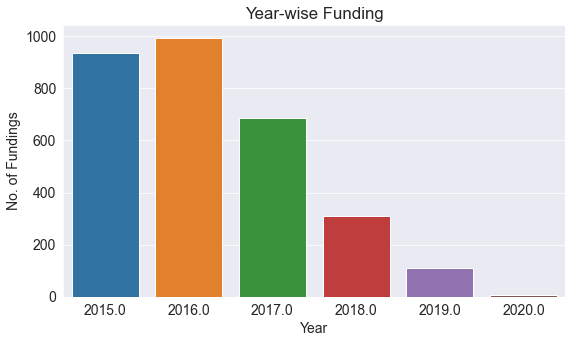

In [35]:
yr = sns.barplot(x=year_funding.index, y=year_funding.values);
yr.set(xlabel = "Year", ylabel = 'No. of Fundings', title = "Year-wise Funding");

2016 received the most no. of fundings and we can observe that the fundings have been declining from 2017 onwards.<br>
NOTE: 2020 has least amount funding as we have data only till January of 2020 and not the complete year data

### We will observe the number of fundings in each month

Creating a series which contains the counts of fundings received each month of every year using the value_counts() method. Then plot a line chart using seaborn with months on x-axis and counts of funding on y-axis.

In [36]:
month_funding = funding_df.Date.dt.month.value_counts()
month_funding

6.0     296
1.0     276
8.0     272
4.0     262
7.0     252
3.0     251
2.0     248
11.0    247
9.0     241
5.0     241
10.0    236
12.0    221
Name: Date, dtype: int64

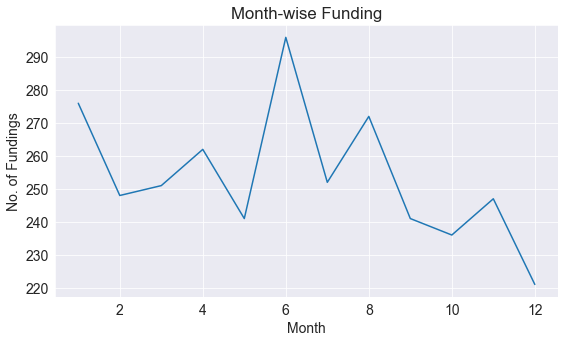

In [37]:
yr = sns.lineplot(x=month_funding.index, y=month_funding.values);
yr.set(xlabel = "Month", ylabel = 'No. of Fundings', title = "Month-wise Funding");

### We will observe types of funding through a bar plot.

Create a series which contains the count of different types of fundings received each year using the value_counts() method. <br>Then plot a bar chart using seaborn with types of funding on x-axis and counts of funding on y-axis

In [38]:
investment = funding_df.InvestmentType.value_counts()
investment

Seed/Angel Funding             1542
Private Equity                 1361
Debt Funding                     25
Series A                         24
Series B                         20
Series C                         14
Series D                         12
Pre-series A                      9
Venture Round                     2
Series F                          2
Series E                          2
Equity                            2
Corporate Round                   2
Mezzanine                         1
Series B (Extension)              1
Equity Based Funding              1
Private\\nEquity                  1
Private Funding                   1
Private                           1
Structured Debt                   1
Term Loan                         1
Crowd funding                     1
Debt-Funding                      1
Series J                          1
Debt                              1
Inhouse Funding                   1
Debt and Preference capital       1
Bridge Round                

We will visualize top ten types of funding.

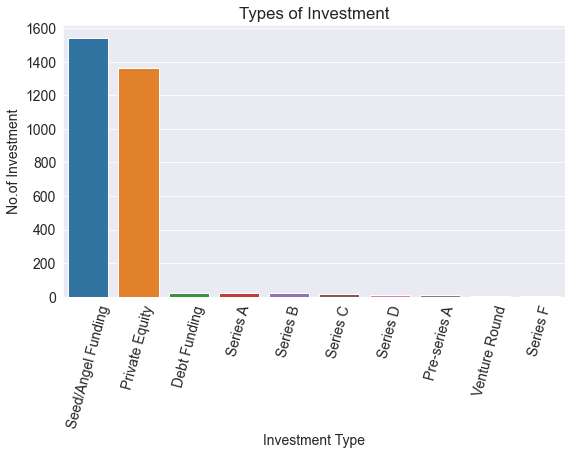

In [39]:
invest_type = sns.barplot(x=investment.index[:10], y=investment.values[:10]);
invest_type.set(xlabel='Investment Type', ylabel='No.of Investment', title='Types of Investment');
invest_type.set_xticklabels(invest_type.get_xticklabels(), rotation=75);

We can observe that most of that funding types are Seed/Angel Funding and Private Equity funding. Other types of funding are almost negligible.

### Visualize Top 10 cities with startups

Create a series which contains the No. of startups in different cities using the value_counts() method.

In [40]:
city = funding_df.Location.value_counts()
city

Bangalore             841
Mumbai                567
New Delhi             421
Gurugram              337
Pune                  105
                     ... 
Delhi & Cambridge       1
Bhubneswar              1
Srinagar                1
Rourkela                1
Dallas / Hyderabad      1
Name: Location, Length: 110, dtype: int64

Now we will create a pie chart using matplotlib library to see the distribution of no. of startups in top 10 cities cities and observe which city constitutes most percentage of startups.

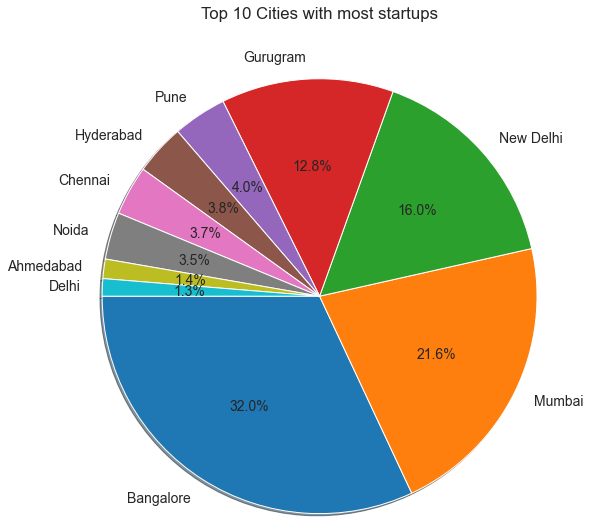

In [41]:
plt.pie(city.values[:10], labels=city.index[:10], startangle = 180, radius=2, autopct='%1.1f%%', shadow=True);
plt.title("Top 10 Cities with most startups", y=1.5);

### Let us visualize top sub-vertical industry types

Create a series with counts of sub-vertical startup types that are funded.

In [42]:
subvertical = funding_df['SubVertical'].value_counts().head(15)
subvertical

Online Lending platform                          23
Food Delivery platform                           14
Online Pharmacy                                  10
Online Learning Platform                          5
Online Education Platform                         5
Education                                         5
Non-Banking Financial Company                     4
Online Insurance Platform                         3
Online platform for Higher Education Services     3
Online Payment Gateway                            3
Logistics                                         3
B2B Marketplace                                   3
Agri-tech                                         3
SaaS                                              3
Online learning platform                          3
Name: SubVertical, dtype: int64

Now create a pie chart to visualize the distribution of top 15 sub-vertical startup types that are funded the most.

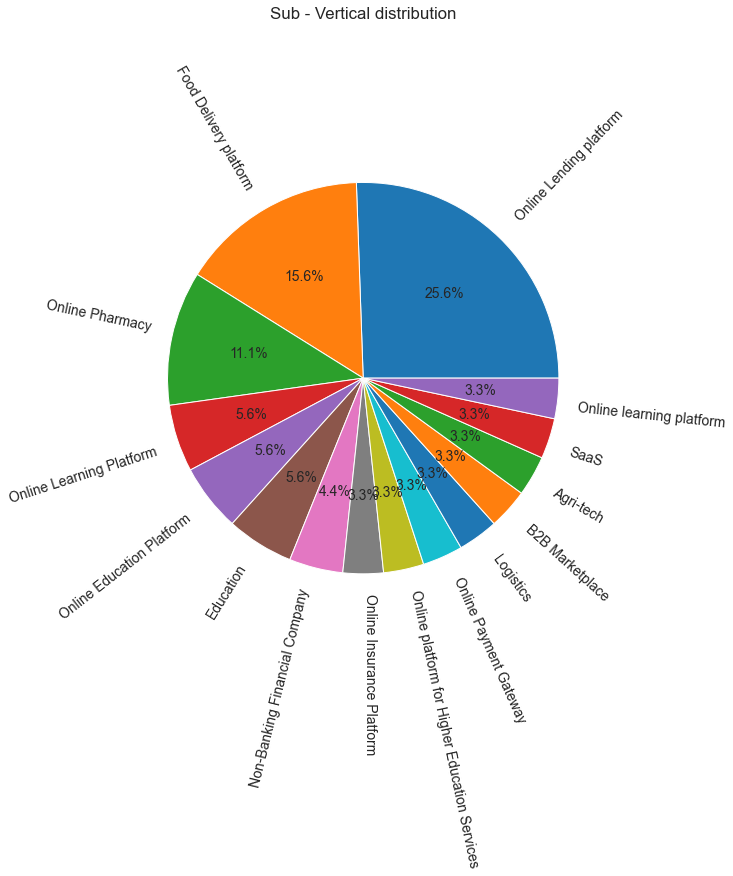

In [43]:
plt.pie(subvertical.values, labels=subvertical.index, radius=1.8, rotatelabels=True, autopct='%1.1f%%');
plt.title('Sub - Vertical distribution', y=1.8);

## Asking and Answering Questions

#### Q1: List 5 startups which have recieved most and least funding

Create two data frame as sort the Funding column in ascending order to obtain the startup which has least funding and sort other one in descending order to obtain the the startups which has highest funding.

In [44]:
least_funding = funding_df.sort_values('Funding', ascending= True).head(5)
least_funding

,SrNo,Date,StartupName,IndustryVertical,SubVertical,Location,InvestorName,InvestmentType,Funding
3017,3018,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed/Angel Funding,16000.0
3021,3022,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed/Angel Funding,16000.0
3020,3021,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed/Angel Funding,16000.0
3019,3020,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed/Angel Funding,16000.0
3018,3019,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed/Angel Funding,16000.0


In [45]:
most_funding = funding_df.sort_values('Funding', ascending= False).head(5)
most_funding

,SrNo,Date,StartupName,IndustryVertical,SubVertical,Location,InvestorName,InvestmentType,Funding
60,61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,3.900000e+09
651,652,2017-08-11,Flipkart,ECommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09
966,967,2017-03-21,Flipkart,ECommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09
830,831,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09


#### Q2: Which Industry types are favoured by the investors??

In [46]:
industry = funding_df.IndustryVertical.value_counts().head(10)
industry

Consumer Internet    941
Technology           478
ECommerce            288
Healthcare            70
Finance               62
Logistics             32
Education             24
Food & Beverage       23
Ed-Tech               14
FinTech                9
Name: IndustryVertical, dtype: int64

Donut Chart is a form of pie chart. First we create a pie chart with industry.values using matplotlib library then we draw a circle of white color with center same as the pie chart.

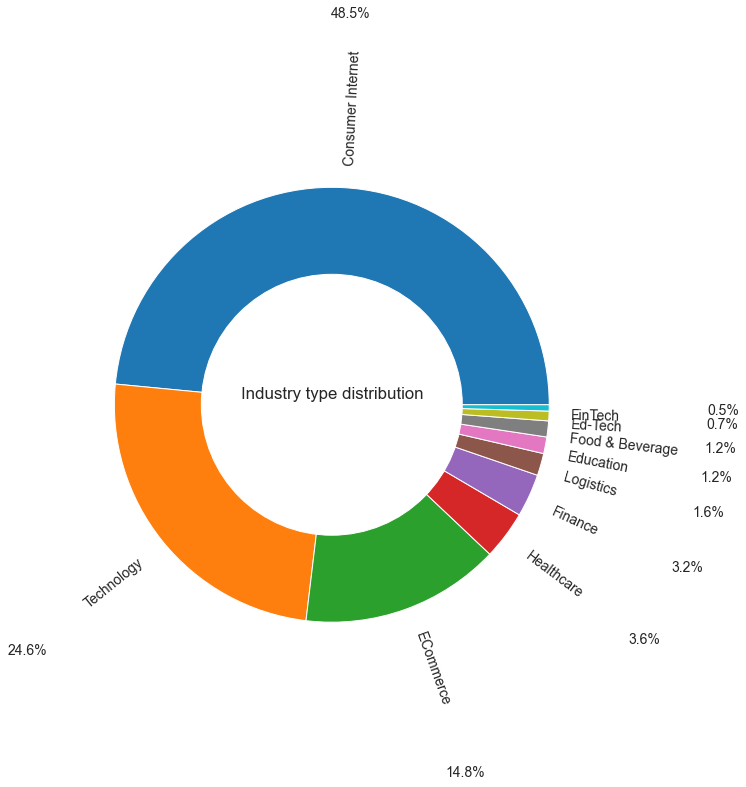

In [47]:
plt.pie(industry.values, labels=industry.index, radius=2.0, rotatelabels=True, autopct='%1.1f%%', pctdistance =1.8);
circle = plt.Circle((0,0), radius=1.2, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle);
plt.title('Industry type distribution',y=0.5);

We can observe that Consumer Internet, Technology and Ecommerce sector makes up almost 90% of the funding.

#### Q3: Who are the top 10 Investors?? (excluding undisclosed investors)

We will create a new data frame investors_df which does not contain Undisclosed investors.<br>
Then create a series max_fund which has the count of investments made by investors.

In [48]:
investors_df = funding_df[funding_df['InvestorName']!="Undisclosed Investors"]
max_fund = investors_df['InvestorName'].value_counts().head(10)
max_fund

Ratan Tata                  25
Indian Angel Network        23
Kalaari Capital             16
Sequoia Capital             15
Group of Angel Investors    15
Accel Partners              12
Venture Catalysts           11
Brand Capital               11
SAIF Partners               10
RoundGlass Partners         10
Name: InvestorName, dtype: int64

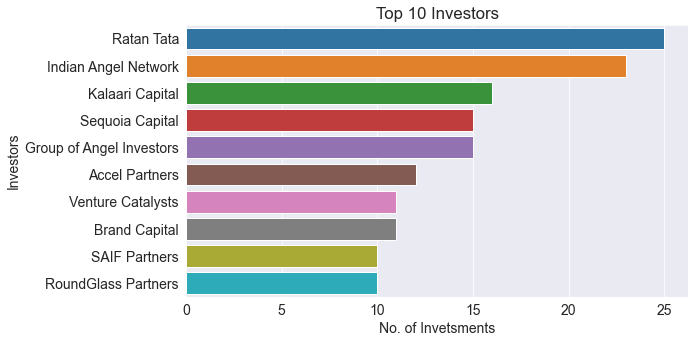

In [49]:
top = sns.barplot(x=max_fund.values, y=max_fund.index);
top.set(xlabel='No. of Invetsments', ylabel='Investors', title='Top 10 Investors');

We can see that Ratan Tata has the most n. of investment supporting Make In India campaign.

#### Q4: Calculate the total funding of Undisclosed Investors.

Creating a dataframe which has only Undisclosed investors.<br>
Then using sum() method on Funding to calculate the total amount of funding by undisclosed investors.

In [50]:
undisclosed_investor = funding_df[funding_df['InvestorName']=='Undisclosed Investors']
undisclosed_investor

,SrNo,Date,StartupName,IndustryVertical,SubVertical,Location,InvestorName,InvestmentType,Funding
69,70,2019-07-10,Ezyhaul,Tech,Logistics,Singapore,Undisclosed Investors,Series B,16000000.0
129,130,2018-11-08,Mobile Premier League,Gaming,Mobile e-Sports,Bangalore,Undisclosed Investors,Series A,500000.0
425,426,2018-01-30,MoneyOnMobile,Technology,Mobile Payment Platform,Mumbai,Undisclosed Investors,Private Equity,7600000.0
432,433,2017-12-05,Mobycy,Technology,Bicycle sharing Platform,Gurugram,Undisclosed Investors,Seed/Angel Funding,500000.0
474,475,2017-11-03,Vagupu,Technology,Online Tutorial Marketplace,Bangalore,Undisclosed Investors,Seed/Angel Funding,1000000.0
...,...,...,...,...,...,...,...,...,...
2883,2884,2015-03-11,Appedo,NaN,NaN,NaN,Undisclosed Investors,Seed/Angel Funding,1000000.0
2922,2923,2015-03-26,ePoise,NaN,NaN,NaN,Undisclosed Investors,Seed/Angel Funding,NaN
2976,2977,2015-02-23,Smartairtrip.com,NaN,NaN,NaN,Undisclosed Investors,Private Equity,10000000.0
3008,3009,2015-01-12,MyDreamStore,NaN,NaN,NaN,Undisclosed Investors,Seed/Angel Funding,290000.0


In [51]:
undisclosed_investor_funding = undisclosed_investor['Funding'].sum()
print('Total funding of Undisclosed Investors = ' + str(undisclosed_investor_funding))

Total funding of Undisclosed Investors = 366227000.0


NOTE : There are some NaN in these undisclosed funding which are ignored

#### Q5: Show which startup has been fundend most times.

Create a series which has the count of how many times a single startup has been funded.

In [52]:
startup_funded = funding_df["StartupName"].value_counts().head(10)
startup_funded

Ola Cabs     8
Swiggy       8
Paytm        7
Meesho       6
Nykaa        6
NoBroker     6
Medinfi      6
UrbanClap    6
Flipkart     5
Grofers      5
Name: StartupName, dtype: int64

We will use x-axis as count and y-axis as the startup names to plot the bar chart.

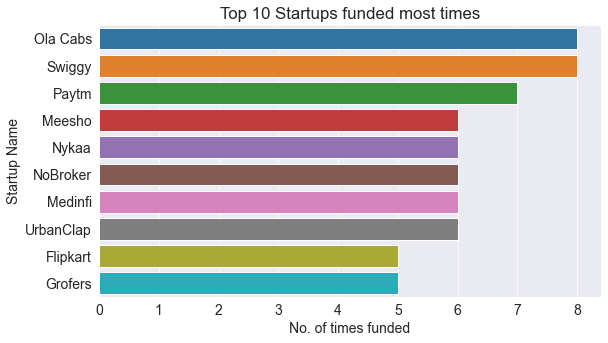

In [53]:
fund_times =sns.barplot(x=startup_funded.values, y=startup_funded.index);
fund_times.set(xlabel='No. of times funded', ylabel='Startup Name', title='Top 10 Startups funded most times');

## Inferences and Conclusion

- We can observe that most of the Investors does not want to disclose their names.
- We can also conclude that three Metro Cities that is Bangalore, Mumbai, New Delhi constitutes 70% of the startups, these cities are preferred as they are well developed.
- It can be learned that investors prefer Technological industry type to invest. We can see in the Sub-vertical industry distribution that online lending platform, online pharmacy, food delivery system is has the most investment as everything is getting digital and hence these type of industries attracts investors.
- This says that services which can make things happen by sitting at home are in more demand.
- Paytm has been one of the most funded startup as part of Digital India, payments are getting digital and it has caught the eye of investors.

## References and Future Work

- Donut Plot - https://www.python-graph-gallery.com/donut-plot/
- Seaborn Bar plot - https://seaborn.pydata.org/generated/seaborn.barplot.html
- Pie Plot - https://www.w3schools.com/python/matplotlib_pie_charts.asp